<a href="https://colab.research.google.com/github/fdhanh/EXAM-PURWADHIKA/blob/master/HAFIDAH_MUSTHA'ANAH_JCAH_DATA_SCIENCE_MODUL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn

WELCOME TO EXAM MODULE 3! :) You're super great that you're here already. Now, buckle up!

Data yang digunakan pada exam ini adalah data Customer Churn dari suatu perusahaan telekomunikasi.

Customer Churn adalah fenomena ketika customer pergi meninggalkan produk kita. Tentu kita tidak menginginkan customer untuk berhenti menggunakan produk kita, kan? 

Inilah tantangannya! Kita akan mencoba memprediksi apakah customer akan churn atau tidak. 

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- Q1 Data Preparation: 15 point
- Q2 Data Visualization: 35 point
- Q3 Classification Modelling: 20 point
- Q4 Perbaikan Modelling: 30 point

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Science/Module 3/EXAM/Churn_ujian.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df_info_index = df.columns.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges'])

In [ ]:
count = []
unique = []
top = []
freq = []
for i in df_info_index: 
    count.append(df[i].count())
    unique.append(df[i].nunique())
    top.append(df[i].value_counts().index[0])
    freq.append(df[i].value_counts()[0])

pd.DataFrame({'count': count,'unique': unique, 'top': top, 'freq': freq}, index = df_info_index)

,count,unique,top,freq
customerID,7043,7043,5298-GSTLM,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
list_item = []
for col in df.columns:
  list_item.append([col, df[col].dtype,
                    df[col].isna().sum(),
                    round((df[col].isna().sum()/len(df[col]))*100,2),
                    df[col].nunique(),
                    list(df[col].sample(2).values)
                    ])
dfDesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data = list_item)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[3211-AAPKX, 2506-TNFCO]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 0]"
3,Partner,object,0,0.0,2,"[No, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[53, 61]"
6,PhoneService,object,0,0.0,2,"[Yes, Yes]"
7,MultipleLines,object,0,0.0,3,"[No phone service, Yes]"
8,InternetService,object,0,0.0,3,"[Fiber optic, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No, No]"


#Q1: Data Preparation (15 point)

## 1. Ubahlah format dari kolom yang menurutmu perlu diubah! (Perlu diingat bahwa untuk membuat modelling machine learning diperlukan data yang memiliki format numerik seluruhnya).
## 2. Adakah missing value pada data tersebut? Jika ada, apakah perlu dilakukan penghapusan missing value?
## 3. Lakukan step data preparation APAPUN yang belum dilakukan di nomor 1 dan 2 di atas.


## 1. Mengubah format kolom <br>
**Gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, dan Churn**

Saya akan mengubah format dengan dummy variabel/one hot, karna kolom tersebut merupakan nominal (tidak punya tingkatan)

Yang pertama saya lakukan adalah mengubah untuk kategorik yang lebih dari 2

In [ ]:
feature_mt3 = dfDesc[dfDesc['unique'] == 3]['dataFeatures'].values

Karna tadi menggunakan code di bawah ini tapi error <br>
`dfDesc[dfDesc['unique'] == (3 or 4)]['dataFeatures'].values` <br>
maka saya membuatnya terpisah menjadi yang kategoriknya ada 3 dan 4

In [ ]:
feature_mt4 = dfDesc[dfDesc['unique'] == 4]['dataFeatures'].values
feature_mt4

array(['PaymentMethod'], dtype=object)

In [ ]:
df_clean = df.copy()
for i in feature_mt3:
    temp = pd.get_dummies(df_clean[i], drop_first = True)
    df_clean = pd.concat([df_clean, temp], axis=1)
    df_clean.drop(i, axis = 1, inplace = True)

In [ ]:
temp = pd.get_dummies(df_clean[feature_mt4], drop_first = True)
df_clean = pd.concat([df_clean, temp], axis=1)
df_clean.drop(feature_mt4, axis = 1, inplace = True)

In [ ]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,One year,Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,56.95,1889.5,No,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No,42.30,1840.75,No,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Kemudian membuat label untuk 2 kategori

In [ ]:
feature_mt2 = dfDesc[dfDesc['unique'] == 2]['dataFeatures'].values
feature_mt2

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in feature_mt2:
    le = LabelEncoder()
    le.fit(df_clean[i])
    temp = le.fit_transform(df_clean[i])
    df_clean.drop(i, axis = 1, inplace = True)
    df_clean[i] = temp.reshape(-1,1)

In [ ]:
df_clean.head()

,customerID,tenure,MonthlyCharges,TotalCharges,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,One year,Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,7590-VHVEG,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Conc** : 
1. Gender: 0 = Female; 1 = Male
2. 0 = No; 1 = Yes

In [ ]:
df_clean['tenure'] = df_clean['tenure'].astype(int)
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(int)

ValueError: ignored

In [ ]:
df_clean['TotalCharges'].astype(float)

ValueError: ignored

In [ ]:
totalcharge = []
error_totalcharge = []
for index, value in enumerate(df['TotalCharges']):
    try:
        if pd.isna(value):
            totalcharge.append(np.nan)
        else:
            totalcharge.append(float(value))
    except:
        totalcharge.append(value)
        error_totalcharge.append(index)

In [ ]:
df.iloc[error_totalcharge]['TotalCharges'].shape

(11,)

## INI MISSING VALUE PADA KOLOM TOTALCHARGES

## 2. Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
float(2)

2.0

In [ ]:
dfDesc[['dataFeatures', 'null']]

,dataFeatures,null
0,customerID,0
1,gender,0
2,SeniorCitizen,0
3,Partner,0
4,Dependents,0
5,tenure,0
6,PhoneService,0
7,MultipleLines,0
8,InternetService,0
9,OnlineSecurity,0


In [ ]:
df_clean.drop(error_totalcharge, inplace = True)

In [ ]:
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

### **CONC**: Kalau dilihat dari dfDesc yang sudah dilakukan sebelumnya, tidak terdapat missing value. Namun, ada satu hal yang terlupakan oleh saya yaitu pada kolom TotalCharge yang error jika di-reformat sebagai int atau float. Ada beberapa nilai yang hanya diisi '[space]' <br>
Yang menurut saya bisa dilakukan untuk missing value pada totalcharge yaitu tidak memakai baris tersebut. <br>
Pertimbangan:
- Hanya ada 11 dari 7043 baris. 
- Jika diisi dari rata-rata pembayaran sepertinya tidak bisa. 

#Q2: Data Visualization (35 point)

##1. Tampilkan visualisasi LINE CHART variabel apapun yang kamu inginkan. Lalu, analisis hasilnya.

##2. Tampilkan visualisasi BOX PLOT dari variabel apapun yang kamu inginkan TERHADAP target variabel "Churn Or Not Churn". Lalu, analisis hasilnya. CONTOH GAMBARANNYA SEPERTI DI BAWAH INI.
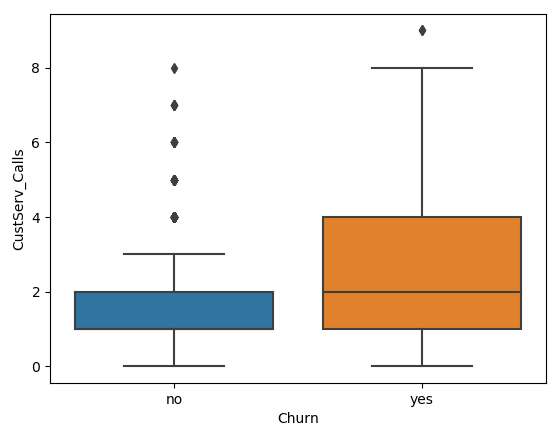

##3. Tampilkan visualisasi HISTOGRAM dengan variabel apapun yang kamu inginkan TERHADAP target variabel "Churn Or Not Churn". CONTOH GAMBAR SEBAGAI BERIKUT.

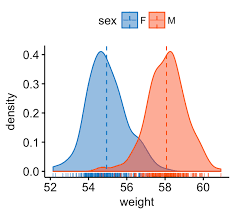


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. LINE CHART

Bingung. Linechart apa terhadap apa ya

## 2. BOXPLOT

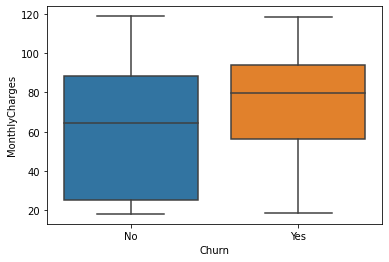

In [ ]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)

Rata-rata orang yang tidak akan meninggalkan produk kita menghabiskan 63 USD (tidak ada keterangan mata uang) dan yang meninggalkan justru spending lebih banyak, yaitu 80 USD

## HISTOGRAM

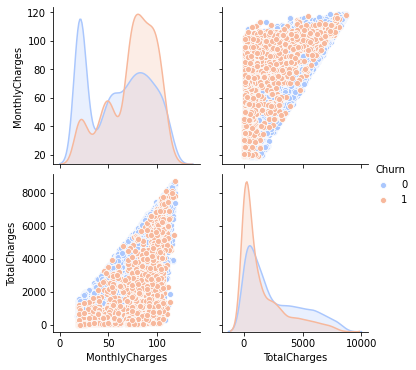

In [ ]:
sns.pairplot(df_clean[['MonthlyCharges', 'TotalCharges', 'Churn']], hue = 'Churn', palette = 'coolwarm')

Dari histogram di atas, disimpulkan bahwa:
1. Semakin kecil biaya yang dihabiskan perbulan, semakin besar peluang customer untuk pergi
2. Untuk TotalCharge kita tidak bisa menentukannya. Karna mau nilai TotalChargenya besar ataupun kecil, keduanya bisa berkemungkinan pergi/tidak

#Q3: Classification Modelling (20 point)

## **Tujuan**: Memprediksi apakah customer akan churn atau tidak churn. Kolom target variabel berjudul "Churn".

## **Metric evaluation**: Tergantung pembuat modelling, yaitu kamu. Gunakan alasan yang tepat mengapa memilih metric evaluation tersebut. Beberapa contoh metric evaluation -> Accuracy, Precision, Recall, etc.

## **Algoritma**: Buatlah modelling dengan minimal 2 algoritma yang berbeda. Contoh: Logistic regression & random forest. Semakin banyak algoritma yang digunakan, maka semakin bisa membandingkan kebaikan model tersebut.

## **Expected Output**: Modelling & metric evaluation.



Untuk metric evaluation yang akan saya lihat adalah nilai recall karna di awal deskripsi, kita menginginkan agar customer tidak meninggalkan kita. Maka yang harus diperhatikan adalah seberapa akurat kita menebak/memprediksi customer yang akan pergi.

In [ ]:
#menentukan feature dan label
x = df_clean.drop(['Churn', 'customerID'], axis = 1)
y = df_clean['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 22, test_size = 0.3)

## Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predict = logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
print(classification_report(y_test, predict))
print('----------------------------------------------------------')
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1558
           1       0.66      0.50      0.57       552

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

----------------------------------------------------------
[[1415  143]
 [ 276  276]]


In [ ]:
predict_train = logreg.predict(x_train)

In [ ]:
print(classification_report(y_train, predict_train))
print('----------------------------------------------------------')
print(confusion_matrix(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3605
           1       0.68      0.55      0.61      1317

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922

----------------------------------------------------------
[[3259  346]
 [ 595  722]]


In [ ]:
logreg_recall = recall_score(y_test, predict)
logreg_accuracy_test = accuracy_score(y_test, predict)
logreg_accuracy_train = accuracy_score(y_train, predict_train)

## Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test, predict))
print('----------------------------------------------------------')
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1558
           1       0.66      0.49      0.56       552

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

----------------------------------------------------------
[[1417  141]
 [ 280  272]]


In [ ]:
predict_train = rfc.predict(x_train)

In [ ]:
print(classification_report(y_train, predict_train))
print('----------------------------------------------------------')
print(confusion_matrix(y_train, predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      1317

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922

----------------------------------------------------------
[[3600    5]
 [   4 1313]]


In [ ]:
rfc_recall = recall_score(y_test, predict)
rfc_accuracy_test = accuracy_score(y_test, predict)
rfc_accuracy_train = accuracy_score(y_train, predict_train)

## Model 3: Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)
predict = gboost.predict(x_test)

In [ ]:
print(classification_report(y_test, predict))
print('----------------------------------------------------------')
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1558
           1       0.67      0.49      0.57       552

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

----------------------------------------------------------
[[1423  135]
 [ 280  272]]


In [ ]:
predict_train = gboost.predict(x_train)

In [ ]:
print(classification_report(y_train, predict_train))
print('----------------------------------------------------------')
print(confusion_matrix(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3605
           1       0.73      0.58      0.65      1317

    accuracy                           0.83      4922
   macro avg       0.80      0.75      0.77      4922
weighted avg       0.82      0.83      0.82      4922

----------------------------------------------------------
[[3329  276]
 [ 554  763]]


In [ ]:
gboost_recall = recall_score(y_test, predict)
gboost_accuracy_test = accuracy_score(y_test, predict)
gboost_accuracy_train = accuracy_score(y_train, predict_train)

## Model 4: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predict = dtree.predict(x_test)

In [ ]:
print(classification_report(y_test, predict))
print('----------------------------------------------------------')
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1558
           1       0.51      0.53      0.52       552

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.75      0.74      0.75      2110

----------------------------------------------------------
[[1279  279]
 [ 260  292]]


In [ ]:
predict_train = dtree.predict(x_train)

In [ ]:
print(classification_report(y_train, predict_train))
print('----------------------------------------------------------')
print(confusion_matrix(y_train, predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      0.99      1.00      1317

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922

----------------------------------------------------------
[[3604    1]
 [   8 1309]]


In [ ]:
dtree_recall = recall_score(y_test, predict)
dtree_accuracy_test = accuracy_score(y_test, predict)
dtree_accuracy_train = accuracy_score(y_train, predict_train)

## SUMMARY

In [ ]:
summary1 = pd.DataFrame({'Recall': [logreg_recall, rfc_recall, gboost_recall, dtree_recall],
                        'Train Accuracy': [logreg_accuracy_train, rfc_accuracy_train, gboost_accuracy_train, dtree_accuracy_train],
                        'Test Accuracy': [logreg_accuracy_test, rfc_accuracy_test, gboost_accuracy_test, dtree_accuracy_test]}, 
                        index = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'])
summary1

,Recall,Train Accuracy,Test Accuracy
Logistic Regression,0.500000,0.808818,0.801422
Random Forest,0.492754,0.998171,0.800474
Gradient Boosting,0.492754,0.831369,0.803318
Decision Tree,0.528986,0.998171,0.744550


**Conc:**
1. Random Forest & DecisionTree overfitting

#Q4: Perbaikan Model (30 point)

## Pada question 4 ini, perbaiki model yang sudah kalian buat pada Q3 di atas.
## Clue: Bisa dilakukan:
##- hyperparameter tuning
##- memasukkan hanya feature yang paling penting ke dalam model (feature importance)
##- check imbalanced target
##- scaling
##- encoding

#HAPPY TUNING :)

In [ ]:
# check apakah data balance atau tidak
print(y.value_counts())
print('--------------')
print(y.value_counts().min()/y.value_counts().max()*100)

0    5163
1    1869
Name: Churn, dtype: int64
--------------
36.199883788495065
